In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Importing Dataset

In [ ]:
df = pd.read_csv("/content/Advertising.csv")
df= df.drop(['Unnamed: 0'], axis= 1)

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Exploration

In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


> There is huge spending on TV advertisement on an average 147000 dollars and minimum on radio 232640.

# Data Cleaning

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

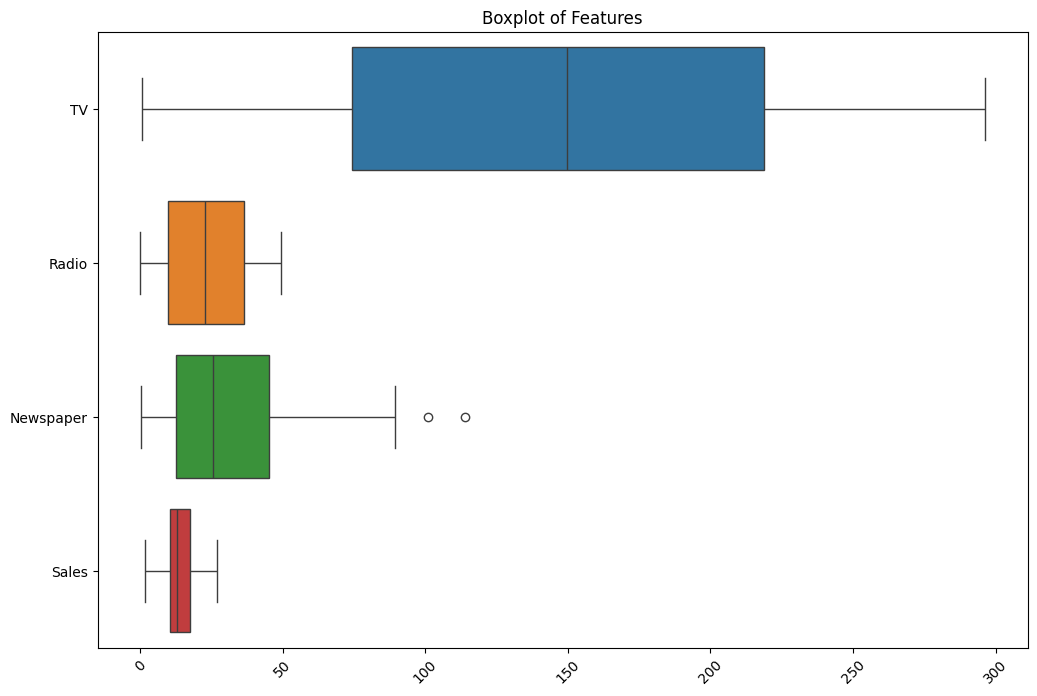

In [ ]:
#box plot
# Outlier Analysis

col_to_plot = df

#create boxplots for all the columns
plt.figure(figsize=(12,8))
sns.boxplot(col_to_plot, orient='h')
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

As shown in the boxplot there is no outlier in the sales.

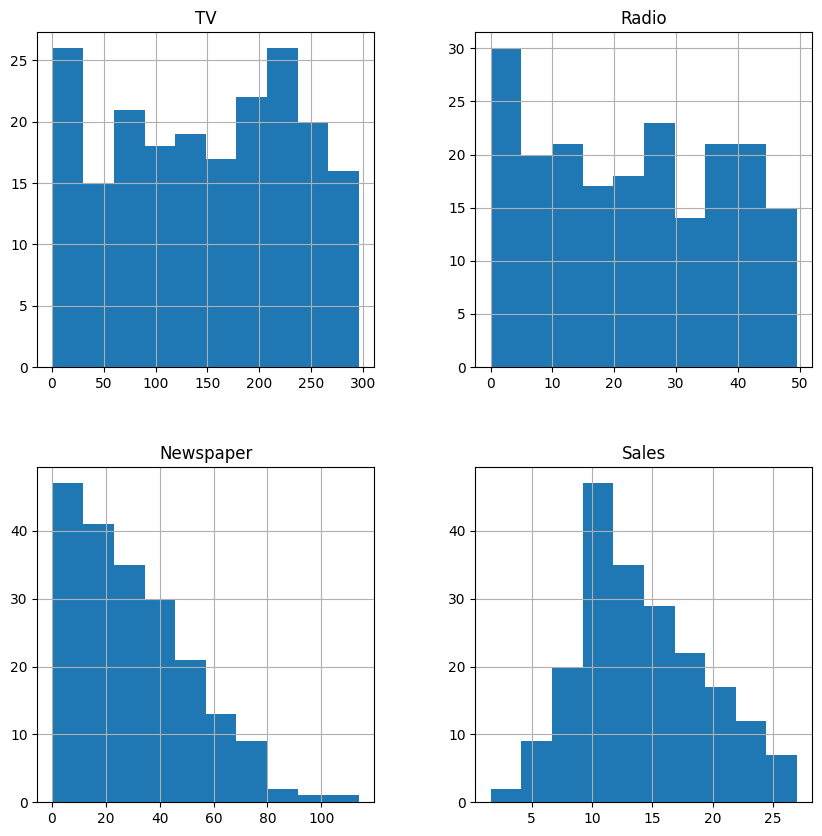

In [ ]:
# to chack all variables at once
df.hist( bins = 10, figsize = (10,10))
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


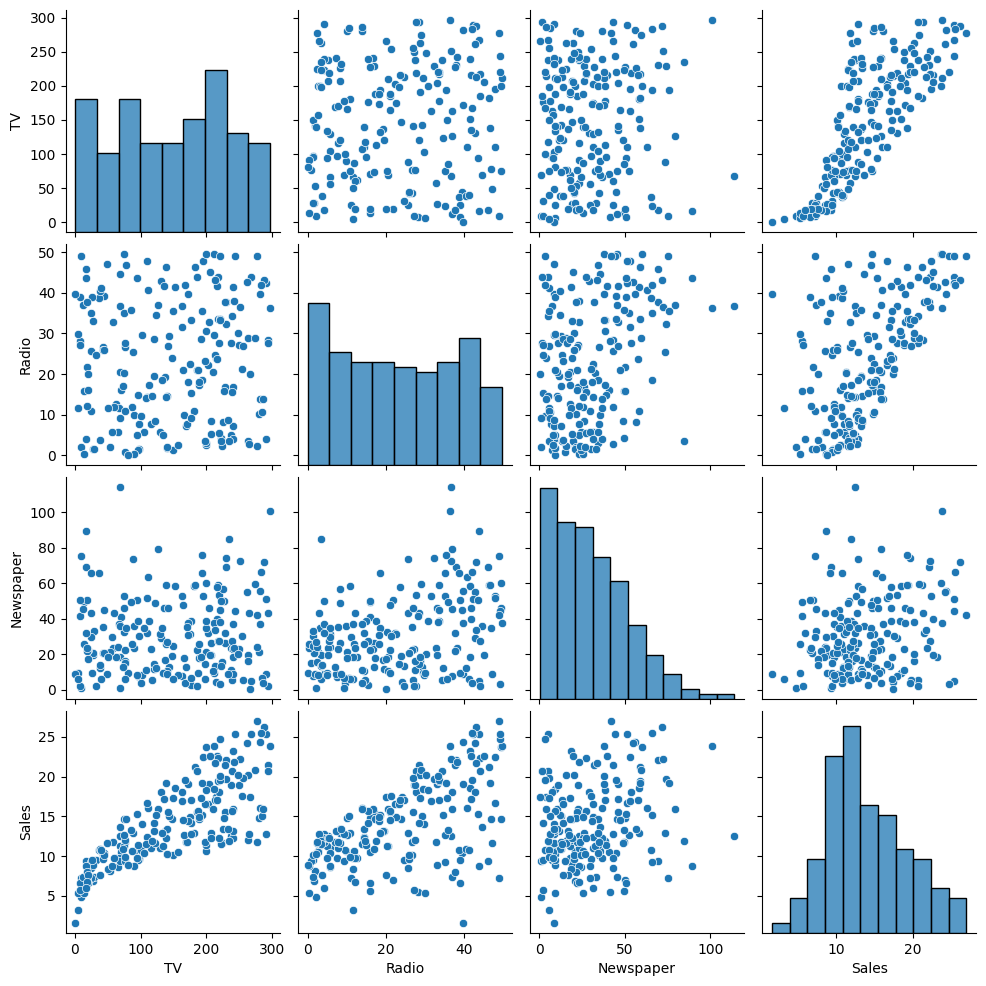

In [ ]:
sns.pairplot(df, size=2.5)
plt.show()

- Target sales is directly correlated with TV, little with Radio but there is no correlation with Newspaper. There is no correlation between the all features

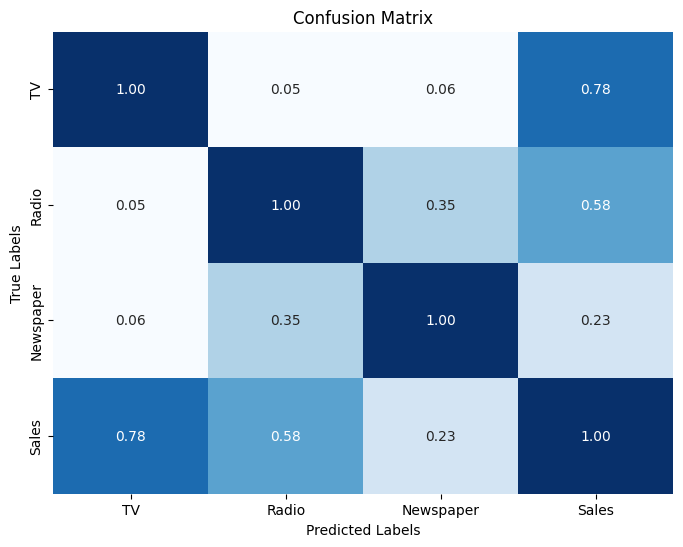

In [ ]:
# Calculate correlations
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

TV seems to be most correlated with Sales

#Checking for autocorrelation and Tuning

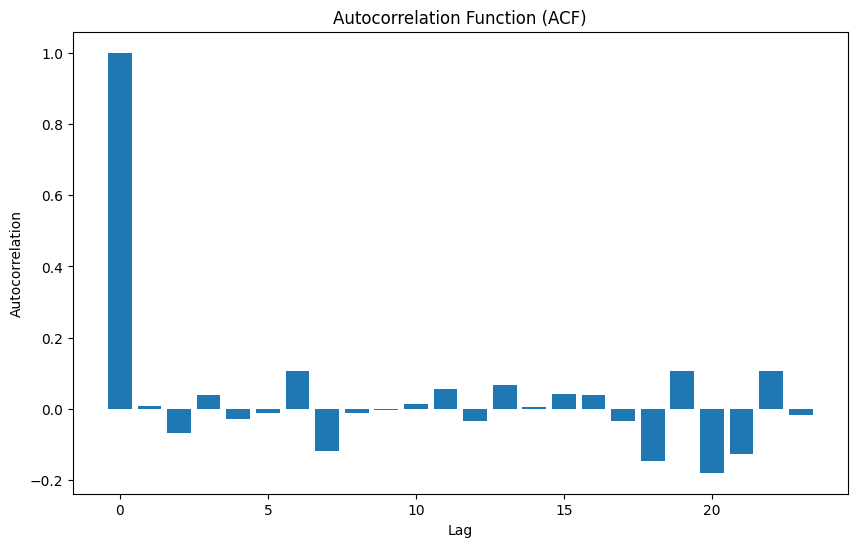

In [ ]:

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'sales_data' is your time series data
# Compute autocorrelation function
Sales = df['Sales']
acf = sm.tsa.acf(Sales)

# Plot autocorrelation function
plt.figure(figsize=(10, 6))
plt.bar(range(len(acf)), acf)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Assuming 'residuals' is the residual values obtained from your model
# Perform Durbin-Watson test
dw_statistic = durbin_watson(Sales)

# Print Durbin-Watson statistic
print("Durbin-Watson statistic:", dw_statistic)


Durbin-Watson statistic: 0.2384259078184977


There exist a highly positive autocorrelation present in the residuals.

Autocorrelation in residuals means that the errors in your model are not independent, which violates one of the key assumptions of linear regression. This could be due to the model not capturing some underlying patterns or trends in the data.

In [ ]:
from sklearn.linear_model import LinearRegression

lag_order = 3
for i in range(1, lag_order + 1):  # lag_order is the maximum lag you want to include
    df[f'sales_lag_{i}'] = df['Sales'].shift(i)

In [ ]:
X = df.iloc[:, :-1].values
y=df['Sales']
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
X_train = pd.DataFrame(X_train)

In [ ]:
print("Value of X_train:", X_train)

print("Value of y_train:", y_train)

Value of X_train:          0     1     2     3     4     5
0    116.0   7.7  23.1  11.0   5.3  14.2
1    177.0   9.3   6.4  12.8   9.7   7.6
2     43.1  26.7  35.1  10.1  14.7  25.4
3     62.3  12.6  18.3   9.7  15.5   5.6
4    224.0   2.4  15.6  11.6   7.0  15.5
..     ...   ...   ...   ...   ...   ...
155   25.0  11.0  29.7   7.2  19.2  20.7
156  204.1  32.9  46.0  19.0   9.7   9.2
157  217.7  33.5  59.0  19.4   7.3  11.2
158  165.6  10.0  17.6  12.6  11.8  11.7
159  280.2  10.1  21.4  14.8  23.8  11.7

[160 rows x 6 columns]
Value of y_train: 79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 160, dtype: float64


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Type of X_train:", type(X_train))
print("Type of y_train:", type(y_train))


Shape of X_train: (160, 6)
Shape of y_train: (160,)
Type of X_train: <class 'pandas.core.frame.DataFrame'>
Type of y_train: <class 'pandas.core.series.Series'>


# Model Training

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Assuming X_train is a pandas DataFrame and y_train is a pandas Series

# Reset indices of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Drop rows with missing values from X_train
X_train.dropna(inplace=True)

# Filter y_train to keep only corresponding rows
y_train = y_train.iloc[X_train.index]

# Define numerical features
num_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_features)
    ])

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Retrieve coefficients and intercept from the trained model
regressor = pipeline.named_steps['regressor']
intercept = regressor.intercept_
coefficients = regressor.coef_

print("Linear coefficients:", coefficients)
print("Intercept:", intercept)


Linear coefficients: [0.01750336 0.03192958 0.00863745 0.0686091  0.08316961 0.04812784]
Intercept: 7.716096717144742


In [ ]:
# prediction
y_pred = regressor.predict(X_test)

# Metrices

In [ ]:
### RMSE ###

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 3.7747533253883394


In [ ]:
### R-squared ###

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5485696977223853

This means that around 54.9% of the variance in the dependent variable (y) can be explained by the independent variable(s) (X) in the regression model.


